In [459]:
import pandas as pd

In [460]:
# Load the datafile
all_seasons = pd.read_csv(r'/Users/theranmeadows/Desktop/data_science_project/MC_contestantInfo/MC_allSeason_info_test.csv')

# Validate the data loaded correctly
all_seasons.head()

,Name,Age,Home State,Status,Season,wins,top,bottom,safe,gender
0,Whitney Miller,22,Michigan,1st,1,6,2,2,6,f
1,David Miller,29,Massachusetts,2nd,1,4,0,0,11,m
2,Lee Knaz,27,California,3rd,1,3,1,2,8,m
3,Sheetal Bhagat,37,Illinois,3rd,1,4,1,2,6,f
4,Sharone Hakman,28,California,4th,1,3,2,1,6,f


In [461]:
# Seperate the class
season_winners = all_seasons['Status']
all_seasons = all_seasons.drop('Status', axis=1)
all_seasons = all_seasons.drop('Season', axis=1)
all_seasons = all_seasons.drop('Name', axis=1)


# Use the get_dummies function to create the dummy variables
allSeason_dummies = pd.get_dummies(all_seasons)

# View the first 5 rows of the dataframe
allSeason_dummies.head()

,Age,wins,top,bottom,safe,Home State_Alabama,Home State_Alamba,Home State_Alaska,Home State_Arizona,Home State_California,...,Home State_Rhode Island,Home State_Rohde Island,Home State_South Carolina,Home State_Tennessee,Home State_Texas,Home State_Virginia,Home State_Washington,Home State_Wisconsin,gender_f,gender_m
0,22,6,2,2,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,29,4,0,0,11,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,27,3,1,2,8,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,37,4,1,2,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,3,2,1,6,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [462]:
# Create x & y arrays
mcx = allSeason_dummies
mcy = season_winners

# Import library
from sklearn.model_selection import train_test_split

# Create training & test datasets
mx_train, mx_test, my_train, my_test = train_test_split(mcx, mcy, test_size = 0.2)

In [463]:
# Load Libraries
from sklearn.tree import DecisionTreeClassifier

# Creat object
decisiontree = DecisionTreeClassifier()

# Train model
dt_model = decisiontree.fit(mx_train, my_train)

In [464]:
# Load libraries
from sklearn.metrics import accuracy_score

# Build predictions
my_test_pred = dt_model.predict(mx_test)

# Calculate accuracy
accuracy_score(my_test, my_test_pred)

0.19148936170212766

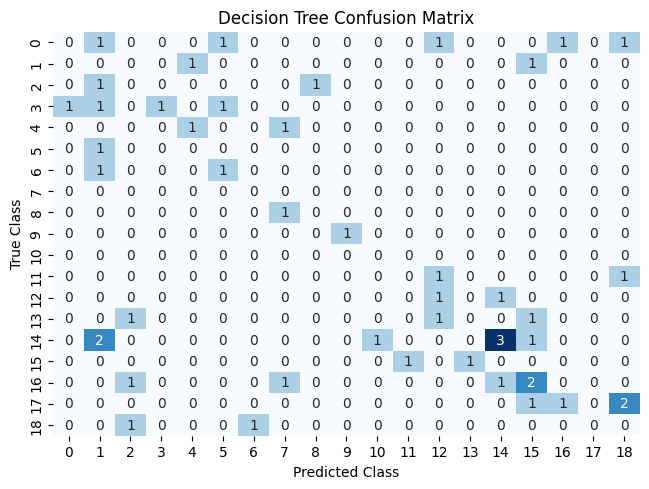

In [428]:
# Load libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
matrix = confusion_matrix(my_test, my_test_pred)

# Create pandas dataframe
c_df = pd.DataFrame(matrix)

# Create heatmap
sns.heatmap(c_df, annot=True, cbar=None, cmap="Blues")
plt.title("Decision Tree Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

[Text(0.6960890436746988, 0.96875, 'x[1] <= 3.5\ngini = 0.941\nsamples = 185\nvalue = [8, 11, 8, 8, 12, 8, 8, 5, 1, 4, 9, 1, 1, 13\n18, 14, 13, 13, 10, 7, 12, 1]'),
 Text(0.4727503765060241, 0.90625, 'x[4] <= 2.5\ngini = 0.934\nsamples = 127\nvalue = [8, 11, 8, 8, 12, 8, 8, 5, 1, 4, 0, 0, 0, 1\n4, 7, 8, 13, 7, 6, 7, 1]'),
 Text(0.5844197100903614, 0.9375, 'True  '),
 Text(0.28463855421686746, 0.84375, 'x[9] <= 0.5\ngini = 0.888\nsamples = 54\nvalue = [1, 1, 3, 6, 10, 8, 8, 5, 1, 4, 0, 0, 0, 0\n0, 0, 2, 1, 2, 1, 0, 1]'),
 Text(0.21586345381526104, 0.78125, 'x[4] <= 0.5\ngini = 0.886\nsamples = 49\nvalue = [1.0, 1.0, 3.0, 6.0, 9.0, 8.0, 7.0, 2.0, 1.0, 4.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 1.0\n0.0, 1.0]'),
 Text(0.15060240963855423, 0.71875, 'x[15] <= 0.5\ngini = 0.848\nsamples = 25\nvalue = [0, 1, 0, 2, 3, 5, 6, 1, 1, 4, 0, 0, 0, 0\n0, 0, 0, 0, 0, 1, 0, 1]'),
 Text(0.142570281124498, 0.65625, 'x[0] <= 42.5\ngini = 0.858\nsamples = 23\nvalue = [0, 1, 0, 2, 3, 5, 4, 1, 1, 4, 0

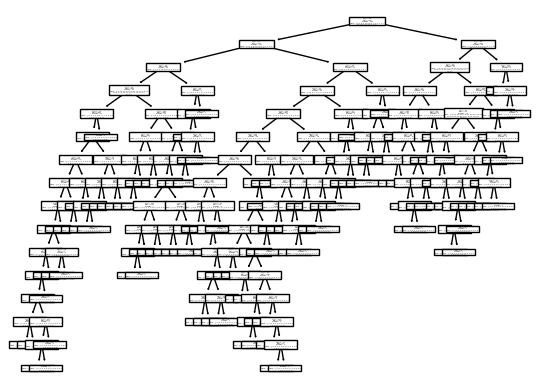

In [429]:
# Load libraries
from sklearn import tree as t

# Plot decision tree
t.plot_tree(dt_model)

In [430]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array 

# Select 3 features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=3)
features_kbest = chi2_selector.fit_transform(mx_train, my_train)

In [431]:
# Get all features
features = array(mx_train.columns)

# Get selected features
filter = chi2_selector.get_support()

# Print Features
print(features[filter])

['wins' 'top' 'safe']


In [432]:

# Creat object
decisiontree_3 = DecisionTreeClassifier(random_state=0)

# Train model
dt_3_model = decisiontree_3.fit(features_kbest, my_train)

In [433]:
# Fit test data
dt_3_test = chi2_selector.transform(mx_test)

# Build predictions
dt_3_test_pred = dt_3_model.predict(dt_3_test)

# Calculate accuracy
print('Point Accuracy score: %', round((accuracy_score(my_test, dt_3_test_pred) * 100), 2))

Point Accuracy score: % 14.89


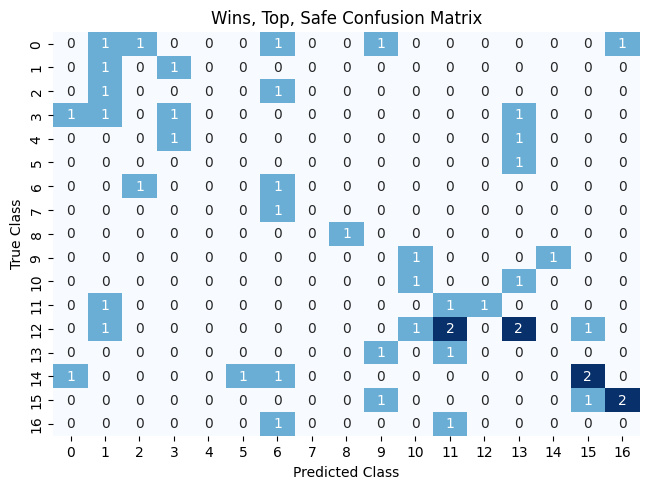

In [434]:
# Create confusion matrix
dt_3_matrix = confusion_matrix(my_test, dt_3_test_pred)

# Create pandas dataframe
c_dt3 = pd.DataFrame(dt_3_matrix)

# Create heatmap
sns.heatmap(c_dt3, annot=True, cbar=None, cmap="Blues")
plt.title("Wins, Top, Safe Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()